In [62]:
import numpy as np
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearnex import patch_sklearn, config_context
patch_sklearn()
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import plotly.express as px


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [63]:
past = 'DataSet/Final/DataSet2017_2021.csv'
df = pd.read_csv(past, delimiter = ';',  low_memory=False, encoding='UTF-8', index_col = False)
df.columns

Index(['data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km', 'municipio',
       'causa_acidente', 'tipo_acidente', 'classificacao_acidente', 'fase_dia',
       'sentido_via', 'condicao_metereologica', 'tipo_pista', 'tracado_via',
       'uso_solo', 'pessoas', 'mortos', 'feridos_leves', 'feridos_graves',
       'ilesos', 'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude',
       'regional', 'delegacia', 'uop', 'ano', 'mes', 'dia', 'mortes'],
      dtype='object')

In [118]:
df1 = df.copy()
#df1 = df1[df['uf'] == 'MG']
#df2 = df[['uf','causa_acidente', 'tipo_acidente', 'classificacao_acidente', 'sentido_via', 'condicao_metereologica', 'tipo_pista', 'tracado_via','uso_solo', 'latitude', 'longitude']]
#df1['uf_br'] = df1['uf'] + ' ' + df1['br'].map(str)
col1 = ['uf', 'longitude', 'latitude', 'mes','causa_acidente', 'tipo_pista', 'tracado_via', 'mortos', 'condicao_metereologica'] # colunas selecionadas
col2 = ['uf', 'mes', 'tipo_pista', 'tracado_via', 'condicao_metereologica', 'causa_acidente'] # colunas categorizada
col3 = ['tipo_pista', 'mes', 'tracado_via', 'condicao_metereologica', 'causa_acidente', 'mortos'] #atributos de estudo

ci = 2
cf = 20

df2 = df1.copy()
df2 = df2[col1]
df2 = df2.reset_index(drop=True)
df3 = df2.copy()
df3

,uf,longitude,latitude,mes,causa_acidente,tipo_pista,tracado_via,mortos,condicao_metereologica
0,PR,-52.387894,-23.098807,January,Fenomenos Da Natureza,Simples,Reta,0,Chuva
1,SC,-48.635700,-27.810100,January,Falta De Atencao A Conducao,Dupla,Curva,0,Chuva
2,PR,309.935131,-23.369520,January,Animais Na Pista,Simples,Reta,0,Garoa/Chuvisco
3,GO,-48.969090,-16.274737,January,Avarias E/Ou Desgaste Excessivo No Pneu,Dupla,Reta,0,Ceu Claro
4,SC,-49.201670,-26.446752,January,Ingestao De Alcool,Simples,Nao Informado,0,Chuva
...,...,...,...,...,...,...,...,...,...
303768,ES,-40.876781,-20.856895,November,Velocidade Incompativel,Simples,Curva,0,Ceu Claro
303769,ES,-40.617537,-20.657276,May,Condutor Deixou De Manter Distancia Do Veiculo...,Simples,Reta,0,Ceu Claro
303770,SC,-48.631008,-27.383995,May,Velocidade Incompativel,Multipla,Nao Informado,1,Nublado
303771,MG,-48.211853,-18.986906,March,Reacao Tardia Ou Ineficiente Do Condutor,Dupla,Reta,0,Ceu Claro


In [119]:
le = preprocessing.LabelEncoder()
for i in col2:
    df3[i] = le.fit_transform(df3[i])

In [120]:
#df3[col2] = stats.zscore(df3[col2])
#df3 = StandardScaler().fit_transform(df3)
#df3 = pd.DataFrame(df3, columns = df3.columns)
#df3 = StandardScaler().fit_transform(df3)
#df3 = pd.DataFrame(df3, columns = df1.columns)
df3 = (df3 - df3.min()) / ( df3.max() - df3.min())
df3

,uf,longitude,latitude,mes,causa_acidente,tipo_pista,tracado_via,mortos,condicao_metereologica
0,0.653846,1.0,1.0,0.363636,0.500000,1.0,0.555556,0.000000,0.111111
1,0.884615,1.0,1.0,0.363636,0.452381,0.0,0.000000,0.000000,0.111111
2,0.653846,1.0,1.0,0.363636,0.095238,1.0,0.555556,0.000000,0.222222
3,0.307692,1.0,1.0,0.363636,0.142857,0.0,0.555556,0.000000,0.000000
4,0.884615,1.0,1.0,0.363636,0.547619,1.0,0.333333,0.000000,0.111111
...,...,...,...,...,...,...,...,...,...
303768,0.269231,1.0,1.0,0.818182,1.000000,1.0,0.000000,0.000000,0.000000
303769,0.269231,1.0,1.0,0.727273,0.178571,1.0,0.555556,0.000000,0.000000
303770,0.884615,1.0,1.0,0.727273,1.000000,0.5,0.333333,0.047619,0.777778
303771,0.384615,1.0,1.0,0.636364,0.821429,0.0,0.555556,0.000000,0.000000


In [121]:
cluster = range(ci,cf)
WCSSKMeans = []
WCSSRandom = []
CHSKMeans = []
CHSRandom = []

for i in cluster:
    model = KMeans(n_clusters = i, init='k-means++', max_iter = 1000)
    model.fit(df3)
    WCSSKMeans.append(model.inertia_)
    CHSKMean.append(metrics.calinski_harabasz_score(df3, model.labels_))
    model = KMeans(n_clusters = i, init= 'random', max_iter = 1000)
    model.fit(df3)
    WCSSRandom.append(model.inertia_)
    CHSRandom.append(metrics.calinski_harabasz_score(df3, model.labels_))
print('terminou')

terminou


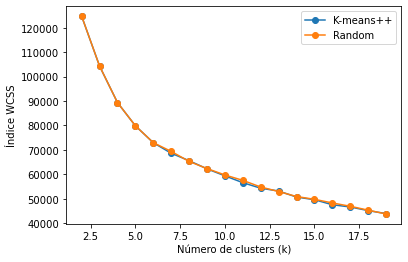

In [122]:
plt.figure() 
plt.plot(cluster, WCSSKMeans, marker = 'o') 
plt.plot(cluster, WCSSRandom, marker = 'o') 
plt.xlabel('Número de clusters (k)') 
plt.ylabel('Índice WCSS') 
plt.legend(['K-means++', 'Random'])
plt.show()

ValueError: x and y must have same first dimension, but have shapes (18,) and (0,)

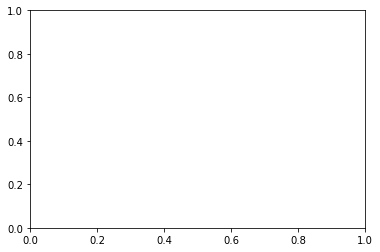

In [123]:
plt.figure() 
plt.plot(cluster, CHSKMeans, marker = 'o') 
plt.plot(cluster, CHSRandom, marker = 'o') 
plt.xlabel('Número de clusters (k)') 
plt.ylabel('Índice Índice Calinski e Harabasz') 
plt.legend(['K-means++', 'Random'])
plt.show()

In [ ]:
x1, y1 = ci, WCSSKMeans[0]
x2, y2 = cf, WCSSKMeans[len(WCSSKMeans)-1]
distances = []
for i in range(len(WCSSKMeans)):
    x0 = i+2
    y0 = WCSSKMeans[i]
    numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
    denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
    distances.append(numerator/denominator)
    
n1 = distances.index(max(distances)) + 2


x1, y1 = ci, WCSSRandom[0]
x2, y2 = cf, WCSSRandom[len(WCSSRandom)-1]
distances = []
for i in range(len(WCSSRandom)):
    x0 = i+2
    y0 = WCSSRandom[i]
    numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
    denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
    distances.append(numerator/denominator)
    
n2 = distances.index(max(distances)) + 2

In [ ]:
if n1 <= n2: 
    n = n1
    metodo = 'k-means++'
else:
    n = n2
    metodo = 'random'
print(str(n1) + ' ' + str(n2))


n = np.argmax(CHS) + ci
print(metodo + ' ' + str(n))
model = KMeans(n_clusters = n, init=metodo, max_iter = 1000)
c = model.fit_predict(df3)



In [ ]:
dfresult = df1.copy()
dfresult = dfresult[col1]
dfresult['cluster'] = model.labels_
dfresult

In [ ]:
dcenter = dfresult.groupby(['cluster']).size().reset_index(name='Frequency')
dcenter
for i,a in enumerate(col1):
    dcenter[a] = model.cluster_centers_[:,i]
dcenter

In [ ]:
dre = []
for j in range(0,n):
    print('Cluster ' + str(j))
    dd = dfresult[dfresult['cluster'] == j]
    for i in col3:
        d = dd[[i]].copy()
        dfselect = d.groupby([i]).size().reset_index(name='Frequency')
        dfselect = dfselect.sort_values(by=['Frequency'], ascending=False)
        dfselect['Frequencia %'] = (dfselect['Frequency']/dfselect['Frequency'].sum())*100
        dre.append(dfselect)
        print(dfselect)

In [ ]:
dfuf = dfresult.groupby(['cluster', 'uf']).size().reset_index(name='Frequency')
for i in range(0,n):
    fig = px.pie(dfuf[dfuf['cluster']==i], names ='uf', values = 'Frequency', title='Population of American continent')
    fig.update_traces(textposition='inside', textinfo='percent+label')
    #fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
    fig.show()